<a href="https://colab.research.google.com/github/Fr0stb1t3/DataScience-Assignment/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part A
#Heirarical Clustering


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
f = files.upload()

In [3]:
dataset = pd.read_csv(r'C:\Users\Pavachi\Downloads\Mall_Customers.csv')


In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = dataset.iloc[:,[3,4]].values

In [6]:
import scipy.cluster.hierarchy as sch

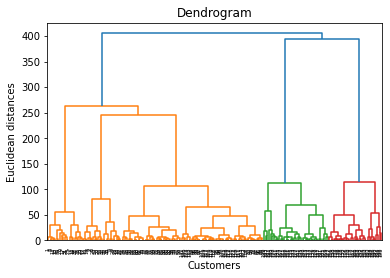

In [7]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
# algorithm class

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')


In [9]:
y_hc = hc.fit_predict(X)

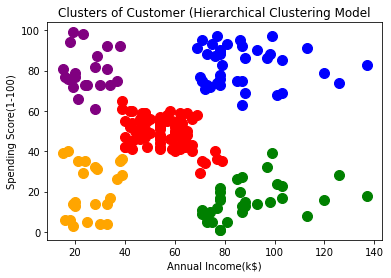

In [10]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

From this cluster we can infer that:
<br> Green: High Income vs Low Spending => careful
<br> Red: Normal Income vs Normal Spending => Standard
<br> Blue: High Income vs High Spending => Target
<br> Purple: Low Income vs High Spending => careless
<br> Orange: Low Income vs Low Spending => Sensible

#Text analysis using topic modelling

In [11]:
import pandas as pd
import os

In [14]:
papers  = pd.read_csv(r'C:\Users\Pavachi\Desktop\papers.csv')
#Uncomment the following lines if you are going to upload the file to Colab 
#from google.colab import files
#f = files.upload()
#papers  = pd.read_csv('papers.csv')

In [15]:
#papers = pd.read_csv('papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [16]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
4011,2012,Compressive Sensing MRI with Wavelet Tree Spar...,In Compressive Sensing Magnetic Resonance Imag...,Compressive Sensing MRI with Wavelet Tree Spar...
5371,2015,Backpropagation for Energy-Efficient Neuromorp...,Solving real world problems with embedded neur...,Backpropagation for\nEnergy-Efficient Neuromor...
6273,1993,Unsupervised Learning of Mixtures of Multiple ...,Abstract Missing,Unsupervised Learning of Mixtures of\nMultiple...
2743,2008,Semi-supervised Learning with Weakly-Related U...,The cluster assumption is exploited by most se...,Semi-supervised Learning with Weakly-Related\n...
3395,2010,The Multidimensional Wisdom of Crowds,Abstract Missing,The Multidimensional Wisdom of Crowds\nPeter W...


In [17]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))


In [18]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

4011    compressive sensing mri with wavelet tree spar...
5371    backpropagation for\nenergy-efficient neuromor...
6273    unsupervised learning of mixtures of\nmultiple...
2743    semi-supervised learning with weakly-related\n...
3395    the multidimensional wisdom of crowds\npeter w...
Name: paper_text_processed, dtype: object

In [20]:
conda install -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done


## Package Plan ##

  environment location: C:\Users\Pavachi\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.8.2.2          |   py38h294d835_0         187 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         187 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/win-64::wordcloud-1.8.2.2-py38h294d835_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.14.0-py38haa95532_0 --> conda-forge::conda-4.14.0-py38haa244fe_0




wordcloud-1.8.2.2    | 187 KB    |            |   0% 
wordcloud-1.8.2.2    | 187 KB    | 8          |   9% 
wordcloud-1.

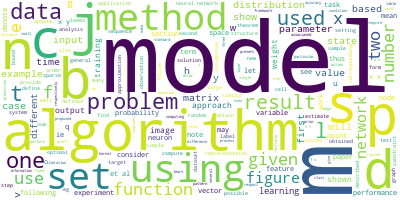

In [21]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [22]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


C:\Users\Pavachi\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pavachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [24]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))


In [25]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['compressive', 'sensing', 'mri', 'wavelet', 'tree', 'sparsity', 'chen', 'chen', 'junzhou', 'huang', 'department', 'computer', 'science', 'engineering', 'university', 'texas', 'arlington', 'cchen', 'mavsutaedu', 'jzhuang', 'utaedu', 'abstract', 'compressive', 'sensing', 'magnetic', 'resonance', 'imaging', 'cs', 'mri', 'one']


In [26]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 4), (6, 1), (7, 34), (8, 41), (9, 4), (10, 2), (11, 4), (12, 6), (13, 1), (14, 11), (15, 3), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 3), (27, 2), (28, 1), (29, 7)]


In [30]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"model" + 0.006*"data" + 0.005*"algorithm" + 0.005*"using" + '
  '0.005*"learning" + 0.004*"set" + 0.004*"models" + 0.004*"parameters" + '
  '0.004*"time" + 0.004*"neural"'),
 (1,
  '0.008*"model" + 0.007*"data" + 0.006*"learning" + 0.006*"algorithm" + '
  '0.004*"using" + 0.004*"training" + 0.003*"one" + 0.003*"set" + '
  '0.003*"parameters" + 0.003*"figure"'),
 (2,
  '0.008*"data" + 0.006*"model" + 0.005*"using" + 0.005*"set" + 0.004*"figure" '
  '+ 0.004*"time" + 0.003*"learning" + 0.003*"number" + 0.003*"algorithm" + '
  '0.003*"one"'),
 (3,
  '0.008*"data" + 0.005*"function" + 0.004*"one" + 0.004*"matrix" + '
  '0.004*"learning" + 0.004*"algorithm" + 0.004*"neural" + 0.003*"number" + '
  '0.003*"two" + 0.003*"set"'),
 (4,
  '0.006*"model" + 0.005*"learning" + 0.005*"data" + 0.004*"number" + '
  '0.004*"function" + 0.004*"algorithm" + 0.004*"two" + 0.004*"using" + '
  '0.003*"distribution" + 0.003*"state"'),
 (5,
  '0.008*"model" + 0.007*"algorithm" + 0.007*"data" + 0